<a href="https://colab.research.google.com/github/eduzortea/SmartAutoScan_Alura_Aula4/blob/main/SmartAutoScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install google-generativeai

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


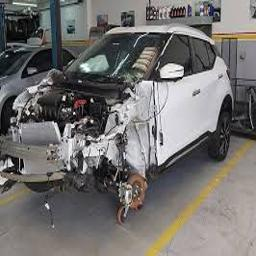

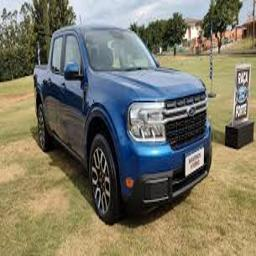

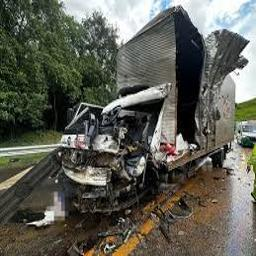

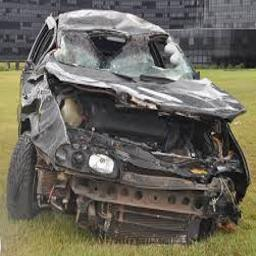

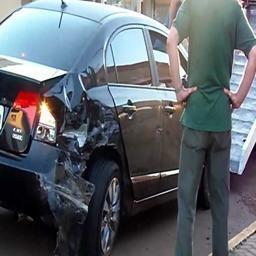

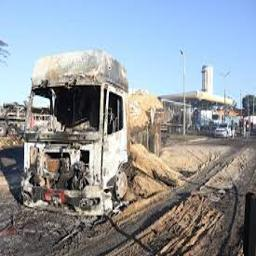

Aqui está uma análise dos danos do ponto de vista financeiro, classificando-os em: Sem Dano, Dano Leve, Dano Médio e Dano Severo:

* **WER-897421.jpeg - Dano Severo:** O dano neste veículo é extenso, afetando múltiplos painéis da carroçaria e componentes mecânicos. O custo do reparo provavelmente será muito alto, possivelmente excedendo o valor do veículo. 
* **AUE-267789.jpeg - Sem Dano:** Este veículo parece estar em perfeitas condições, sem nenhum dano visível.
* **HRV-782547.jpeg - Dano Severo:**  Assim como no primeiro veículo, o dano neste caminhão é catastrófico. A cabine está completamente destruída e a estrutura do veículo parece comprometida. O custo do reparo seria exorbitante e provavelmente inviável.
* **BAW_258577.jpeg - Dano Severo:**  A parte frontal do veículo está completamente destruída, impactando o motor, suspensão e sistema de direção. Este veículo provavelmente é perda total, com custo de reparo superior ao valor do carro.
* **AX7-894778.jpeg - Dano Médio:** O da

In [42]:
from pathlib import Path
import google.colab.drive as drive
from google.colab import userdata
import google.generativeai as genai
from IPython.display import display, Image  # Importar display e Image para mostrar imagens
from PIL import Image as PILImage  # Importar PIL para manipular imagens

# Montar o Google Drive
drive.mount('/content/drive')

# Definindo os caminhos para as pastas
images_aprendizado_path = Path("/content/drive/MyDrive/Colab Notebooks/aprendizado")

# Obter a chave de API e configurar o GenAI
api_key = userdata.get("SECRET_KEY")
genai.configure(api_key=api_key)

# Configuração do modelo
generation_config = {
    "temperature": 1,
    "top_p": 0.95,
    "top_k": 0,
    "max_output_tokens": 8192,
}

safety_settings = [
    # suas configurações de segurança aqui
]

model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

prompt_parts = [
    "Analise o dano do ponto de vista financeiro. Classificando em: Sem Dano, Dano Leve, Dano Médio e Dano Severo.",
]

# Adicionar arquivos dinamicamente da pasta 'aprendizado' e exibir imagens
for image_path in images_aprendizado_path.glob('*.jpeg'):
    img = PILImage.open(image_path)
    img_resized = img.resize((256, 256))  # Redimensionar a imagem para 256x256
    img_resized.save(image_path)  # Salvar a imagem redimensionada
    display(img_resized)  # Exibir a imagem redimensionada
    prompt_parts.extend([
        "input: ",
        genai.upload_file(str(image_path)),
        f"output: {image_path.name} - [Sua classificação aqui]",  # Adicione sua classificação
    ])

# Gerar conteúdo com o modelo
response = model.generate_content(prompt_parts)
print(response.text)


